# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.


**Notebook index:**

* This notebook excercise has been classified as follows:

1. Data Understanding and Cleaning
2. Feature Engineering (Derived Variables)
3. EDA
4. Train-Test Split
5. Dealing with Data-imbalance
6. Feature Scaling
7. Model building and Validating
8. Business Recomendation

In [1]:
#df_f3 Structures
import pandas as pd

import numpy as np
import re
import os
import time

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
#INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW
#(e.g. if files are in same folder as notebook, simple write "train.csv" as path)

df = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
df_dict = pd.read_csv("data_dictionary.csv")

print(df.shape)
print(unseen.shape)
print(sample.shape)
print(df_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


# 1. Data Understanding and Cleaning

In [3]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [4]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [5]:
df_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.0,17499.5,34999.0,52498.5,69998.00
circle_id,69999.0,109.000000,0.000000,109.0,109.0,109.0,109.0,109.00
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
std_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...
aon,69999.0,1220.639709,952.426321,180.0,468.0,868.0,1813.0,4337.00
aug_vbc_3g,69999.0,68.108597,269.328659,0.0,0.0,0.0,0.0,12916.22
jul_vbc_3g,69999.0,65.935830,267.899034,0.0,0.0,0.0,0.0,9165.60
jun_vbc_3g,69999.0,60.076740,257.226810,0.0,0.0,0.0,0.0,11166.21


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [8]:
df = df.set_index('id')

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    arpu_6                    float64
 8    arpu_7                    float64
 9    arpu_8                    float64
 10   onnet_mou_6               float64
 11   onnet_mou_7               float64
 12   onnet_mou_8               float64
 13   offnet_mou_6              float64
 14   offnet_mou_7              float64
 15   offnet_mou_8              float64
 16   roam_ic_mou_6             float64
 17   roam_ic_mou_7             float64
 18   roam_ic_mou_8             float64
 19   roam_og_mou_6             float64
 20   roam_og_m

## 1.1 Removing columns with non-unique values

In [10]:
drop_cols = [c for c
             in list(df)
             if df[c].nunique() <= 1]
print(drop_cols)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [11]:
df_f1=df.drop(columns=drop_cols)
df_f1.shape

(69999, 158)

## 1.2 Converting datetime format

In [12]:
# We see that the columns with datetime values are represented as object, they can be converted into datetime format

# selecting all the columns with datetime format
date_col= df_f1.select_dtypes(include=['object'])
print("\n Columns of datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
for i in date_col.columns:
    df_f1[i] = pd.to_datetime(df_f1[i])

# Current dimension of the df_f3set
df_f1.shape


 Columns of datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


(69999, 158)

In [13]:
df_f2= df_f1.copy()
df_f2.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Data columns (total 158 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    arpu_6                    float64       
 1    arpu_7                    float64       
 2    arpu_8                    float64       
 3    onnet_mou_6               float64       
 4    onnet_mou_7               float64       
 5    onnet_mou_8               float64       
 6    offnet_mou_6              float64       
 7    offnet_mou_7              float64       
 8    offnet_mou_8              float64       
 9    roam_ic_mou_6             float64       
 10   roam_ic_mou_7             float64       
 11   roam_ic_mou_8             float64       
 12   roam_og_mou_6             float64       
 13   roam_og_mou_7             float64       
 14   roam_og_mou_8             float64       
 15   loc_og_t2t_mou_6          float64       
 16   loc_og_t2t_mou_7          float64       
 1

## 1.3 Handling missing values

In [14]:
# Checkng the overall missing values in the df_f3set
((df_f1.isnull().sum()/df_f1.shape[0])*100).round(2).sort_values(ascending=False)

av_rech_amt_data_6    74.9
count_rech_3g_6       74.9
arpu_3g_6             74.9
arpu_2g_6             74.9
max_rech_data_6       74.9
                      ... 
vol_2g_mb_6            0.0
vol_2g_mb_7            0.0
vol_2g_mb_8            0.0
vol_3g_mb_6            0.0
churn_probability      0.0
Length: 158, dtype: float64

### 1.3.1 Handling missing values with meaningful deductions for total recharge

In [15]:
# Handling missing values with respect to `df_data_recharge` attributes
df_f2[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
id,,,
0,NaT,NaN,NaN
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-25,7.0,25.0
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,2014-06-20,1.0,198.0
8,NaT,NaN,NaN


* Let us consider the column `date_of_last_rech_data` indicating the date of the last recharge made in any given month for mobile internet. Here it can deduced if the `total_rech_data` and the `max_rech_data` also have missing values, the missing values in all the columns mentioned can be considered as meaningful missing.<br> 
* Hence imputing 0 as their values.<br>
* Meaningful missing in this case represents that the customer has not done any recharge for mobile internet.

In [16]:
# Code for conditional imputation
start_time=time.time()
for i in range(len(df_f2)):
  # Handling 'total_rech_data', 'max_rech_data' and for col month 6
    if pd.isnull((df_f2['total_rech_data_6'][i]) and (df_f2['max_rech_data_6'][i])):
        if pd.isnull(df_f2['date_of_last_rech_data_6'][i]):
            df_f2['total_rech_data_6'][i]=0
            df_f2['max_rech_data_6'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for col month 7
    if pd.isnull((df_f2['total_rech_data_7'][i]) and (df_f2['max_rech_data_7'][i])):
        if pd.isnull(df_f2['date_of_last_rech_data_7'][i]):
            df_f2['total_rech_data_7'][i]=0
            df_f2['max_rech_data_7'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for dol month 8
    if pd.isnull((df_f2['total_rech_data_8'][i]) and (df_f2['max_rech_data_8'][i])):
        if pd.isnull(df_f2['date_of_last_rech_data_8'][i]):
            df_f2['total_rech_data_8'][i]=0
            df_f2['max_rech_data_8'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for col month 9
    # if pd.isnull((df_f2['total_rech_data_9'][i]) and (df_f2['max_rech_data_9'][i])):
    #     if pd.isnull(df_f2['date_of_last_rech_data_9'][i]):
    #         df_f2['total_rech_data_9'][i]=0
    #         df_f2['max_rech_data_9'][i]=0
end_time = time.time()

print("\nExecution Time = ", round(end_time-start_time,2),"seconds")
print("The columns \n'total_rech_data_6','total_rech_data_7','total_rech_data_8'\n'max_rech_data_6','max_rech_data_7','max_rech_data_8' are imputed with 0 based on the condition explained above")


Execution Time =  30.85 seconds
The columns 
'total_rech_data_6','total_rech_data_7','total_rech_data_8'
'max_rech_data_6','max_rech_data_7','max_rech_data_8' are imputed with 0 based on the condition explained above


### 1.3.2 Handling the missing values for the attributes count_rech_2g_*,count_rech_3g_* for month 6,7,8 

In [17]:
# Checking the related columns values
df_f2[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
id,,,
0,NaN,NaN,0.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,7.0,0.0,7.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,1.0,0.0,1.0
8,NaN,NaN,0.0


* From the above tablular the column values of `total_rech_data` is the sum of the columns values of `count_rech_2g` and `count_rech_3g` for each month from 6 to 8 respectively, which derives to a multicollinearity issue.
* In order to reduce the multicollinearity, we can drop the columns `count_rech_2g` and `count_rech_3g` for each month from 6 to 8 respectively.

In [18]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7 and 8
df_f2.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8'],axis=1, inplace=True)

print("The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8' columns are dropped as they can be explained from the 'total_rech_df_f3'column")

The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8' columns are dropped as they can be explained from the 'total_rech_df_f3'column


### 1.3.3 Handling the missing values for the attributes `arpu_3g_*`,`arpu_2g_*` for month 6,7 and 8

In [19]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7 and 8

print("Correlation table for month 6\n\n", df_f2[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", df_f2[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", df_f2[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.930150            0.805494
arpu_2g_6            0.930150   1.000000            0.833773
av_rech_amt_data_6   0.805494   0.833773            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000    0.93443            0.799627
arpu_2g_7            0.934430    1.00000            0.815300
av_rech_amt_data_7   0.799627    0.81530            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.923875            0.786412
arpu_2g_8            0.923875   1.000000            0.800717
av_rech_amt_data_8   0.786412   0.800717            1.000000


In [20]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' for month 6,7 and 8 
df_f2.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8'],axis=1, inplace=True)
print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8' are dropped from the df_f3set due to high correlation between their respective arpu_* variable in the df_f3set\n")


The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8' are dropped from the df_f3set due to high correlation between their respective arpu_* variable in the df_f3set



In [21]:
df_f2.shape

(69999, 146)

### 1.3.4 Handling the missing values for the attributes `av_rech_amt_data_*` for month 6,7 and 8

In [22]:
# Checking the related columns values

df_f2[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(10)

,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
id,,,
0,NaN,0.0,0.0
1,145.0,145.0,1.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,191.0,41.0,7.0
5,NaN,0.0,0.0
6,NaN,0.0,0.0
7,198.0,198.0,1.0
8,NaN,0.0,0.0


* From the above tabular it is deduced that the missing values for the column `av_rech_amt_data_*` for each month from 6 to 8 can be replaced as 0 if the `total_rech_data_*` is 0. 
* i.e. if the total recharge done is 0 then the average recharge amount shall also be 0.

In [23]:
# Code for conditional imputation
start_time = time.time()
for i in range(len(df_f2)):
  # Handling `av_rech_amt_data`  for month 6
    if (pd.isnull(df_f2['av_rech_amt_data_6'][i]) and (df_f2['total_rech_data_6'][i]==0)):
        df_f2['av_rech_amt_data_6'][i] = 0

  # Handling `av_rech_amt_data`  for month 7
    if (pd.isnull(df_f2['av_rech_amt_data_7'][i]) and (df_f2['total_rech_data_7'][i]==0)):
        df_f2['av_rech_amt_data_7'][i] = 0

  # Handling `av_rech_amt_data`  for month 8
    if (pd.isnull(df_f2['av_rech_amt_data_8'][i]) and (df_f2['total_rech_data_8'][i]==0)):
        df_f2['av_rech_amt_data_8'][i] = 0




end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds")
print("\nThe columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' are imputed with 0 based on the condition explained above\n")


Execution Time =  13.98 seconds

The columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' are imputed with 0 based on the condition explained above



### 1.3.5 Lets now drop columns with very high null values

In [24]:
# Checkng the overall missing values in the dataset

((df_f2.isnull().sum()/df_f2.shape[0])*100).round(2).sort_values(ascending=False)

night_pck_user_6            74.90
fb_user_6                   74.90
date_of_last_rech_data_6    74.90
night_pck_user_7            74.48
fb_user_7                   74.48
                            ...  
total_rech_data_8            0.00
max_rech_data_6              0.00
max_rech_data_7              0.00
max_rech_data_8              0.00
churn_probability            0.00
Length: 146, dtype: float64

* From the above results, we can conclude, the `date_of_last_rech_data_*` corresponding to months 6,7 and 8 are of no value after the conditional imputation of columns `total_rech_data_*`,` max_rech_data_*`.
* Also the missing value percentage is high for these columns and can be dropped from the dataset.

In [25]:
# Dropping the columns related to datetime dtype from the dataset
df_f2.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8' are dropped as it has no significance to the data



* The column `fb_user_*` and `night_pck_user_*` for each month from 6 to 8 respectively has a missing values above 70% and does not seem to add any information to understand the data. 
* Hence we can drop these columns for further analysis.

In [26]:
df_f2.drop(['fb_user_6','fb_user_7','fb_user_8',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8'],
                  axis=1, inplace=True)
print("\nThe columns 'fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8' are dropped from the dataset as it has no meaning to the df_f3 snd has high missing values above 50%\n")


The columns 'fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8' are dropped from the dataset as it has no meaning to the df_f3 snd has high missing values above 50%



* Similarly we can remove `date_of_last_rech_data_*` column corresponding to each month since they dont seem to contribute any meaniful information

In [27]:
# Dropping the columns related to ddate_of_last_rech_data_
df_f2.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8' are dropped as it has no significance to the data



In [28]:
df_f2.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0,0,0,1,0,647,0.0,0.0,0.0,0


### 1.3.5 Dropping variables that are highly correlated with target variable (Optional)

In [29]:
# Saving the df_f3 set 

df_f3= df_f2.copy()
df_f3.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Data columns (total 134 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   loc_o

In [30]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones

# Lets list all cols with corr > 80%
df_f3_corr = df_f3.corr()
df_f3_corr.loc[:,:] = np.tril(df_f3_corr, k=-1)
df_f3_corr = df_f3_corr.stack()
df_f3_corr
df_f3_corr[(df_f3_corr > 0.80) | (df_f3_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8               0.958333
isd_og_mou_8        isd_og_mou_7         0.955556
total_rech_amt_7    arpu_7               0.955298
isd_og_mou_8        isd_og_mou_6         0.954055
isd_og_mou_7        isd_og_mou_6         0.952955
total_rech_amt_6    arpu_6               0.952776
sachet_2g_7         total_rech_data_7    0.910150
sachet_2g_6         total_rech_data_6    0.906747
sachet_2g_8         total_rech_data_8    0.906113
total_ic_mou_6      loc_ic_mou_6         0.902722
total_ic_mou_8      loc_ic_mou_8         0.894410
total_ic_mou_7      loc_ic_mou_7         0.891046
std_og_t2t_mou_8    onnet_mou_8          0.862759
std_og_t2t_mou_7    onnet_mou_7          0.862173
std_ic_mou_7        std_ic_t2m_mou_7     0.859262
total_og_mou_8      std_og_mou_8         0.858621
std_og_t2m_mou_8    offnet_mou_8         0.858002
total_og_mou_7      std_og_mou_7         0.856650
std_og_t2m_mou_7    offnet_mou_7         0.855826
std_og_t2t_mou_6    onnet_mou_6          0.855261


In [31]:
# col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
#             'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
#             'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# # These columns can be dropped as they are highly collinered with other predictor variables.
# # criteria set is for collinearity of 85%

# #  dropping these column
# df_f3.drop(col_to_drop, axis=1, inplace=True)

# This will be handled during PCA

### 1.3.6 Lets impute values to the remaining columns using advanced imputation technoque : KNNImputer

In [32]:
# Checkng the overall missing values in the dataset

((df_f3.isnull().sum()/df_f3.shape[0])*100).round(2).sort_values(ascending=False)

std_og_t2m_mou_8      5.29
loc_og_mou_8          5.29
loc_ic_mou_8          5.29
loc_og_t2c_mou_8      5.29
std_og_mou_8          5.29
                      ... 
last_day_rch_amt_8    0.00
total_rech_data_6     0.00
total_rech_data_7     0.00
total_rech_data_8     0.00
churn_probability     0.00
Length: 134, dtype: float64

In [33]:
# Numerical columns available
num_col = df_f3.select_dtypes(include = ['int64','float64']).columns.tolist()

In [34]:
df_f3.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [35]:
# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
df_f3[num_col]=scalar.fit_transform(df_f3[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
start_time=time.time()

df_f3_knn = pd.DataFrame(knn.fit_transform(df_f3[num_col]))
df_f3_knn.columns=df_f3[num_col].columns

end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds\n")


Execution Time =  227.22 seconds



In [36]:
df_f3_knn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0.076359,0.037785,0.027641,0.006586,0.015247,0.00012,0.003855,0.013725,0.000166,0.000000,...,0.0000,0.0,0.0,0.000000,0.0,0.427712,0.0,0.0,0.0,0.0
1,0.075316,0.038767,0.028669,0.000000,0.000000,0.00000,0.000000,0.003690,0.002205,0.000000,...,0.0625,0.0,0.0,0.000000,0.0,0.127496,0.0,0.0,0.0,0.0
2,0.077343,0.038229,0.027423,0.000072,0.001953,0.00000,0.006456,0.011648,0.000000,0.000000,...,0.0000,0.0,0.0,0.000000,0.0,0.168872,0.0,0.0,0.0,0.0
3,0.080530,0.041031,0.030644,0.000984,0.001963,0.00000,0.008223,0.011141,0.003586,0.000000,...,0.0000,0.0,0.0,0.000000,0.0,0.192928,0.0,0.0,0.0,0.0
4,0.083342,0.038915,0.030368,0.002885,0.000592,0.00057,0.006815,0.005410,0.000687,0.018815,...,0.0000,0.0,0.0,0.030303,0.0,0.112341,0.0,0.0,0.0,0.0


In [37]:
df_f3.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,0.076359,0.037785,0.027641,0.006586,0.015247,0.00012,0.003855,0.013725,0.000166,0.000000,...,0.0000,0.0,0.0,0.000000,0.0,0.427712,0.0,0.0,0.0,0.0
1,0.075316,0.038767,0.028669,0.000000,0.000000,0.00000,0.000000,0.003690,0.002205,0.000000,...,0.0625,0.0,0.0,0.000000,0.0,0.127496,0.0,0.0,0.0,0.0
2,0.077343,0.038229,0.027423,0.000072,0.001953,0.00000,0.006456,0.011648,0.000000,0.000000,...,0.0000,0.0,0.0,0.000000,0.0,0.168872,0.0,0.0,0.0,0.0
3,0.080530,0.041031,0.030644,0.000984,0.001963,0.00000,0.008223,0.011141,0.003586,0.000000,...,0.0000,0.0,0.0,0.000000,0.0,0.192928,0.0,0.0,0.0,0.0
4,0.083342,0.038915,0.030368,0.002885,0.000592,0.00057,0.006815,0.005410,0.000687,0.018815,...,0.0000,0.0,0.0,0.030303,0.0,0.112341,0.0,0.0,0.0,0.0


The KNN Imputer has replaced all the null values in the numerical column sucessfully

In [38]:
# Since we scaled the numerical columns for the purpose of handling the null values, 
    #we can restore the scaled values to their original form.

# Converting the scaled data back to the original data
df_f3[num_col]=scalar.inverse_transform(df_f3_knn)

# Checking the top 10 data
df_f3.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0.0,0.0,0.0,0.0,0.0,1958.0,0.00,0.00,0.00,0.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,1.0,0.0,0.0,0.0,0.0,710.0,0.00,0.00,0.00,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,882.0,0.00,0.00,0.00,0.0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0.0,0.0,0.0,0.0,0.0,982.0,0.00,0.00,0.00,0.0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0.0,0.0,0.0,1.0,0.0,647.0,0.00,0.00,0.00,0.0
5,86.193,83.351,88.462,1.39,1.78,0.45,17.14,24.26,3.44,0.00,...,0.0,0.0,0.0,0.0,0.0,698.0,0.00,0.00,0.00,0.0
6,54.173,95.130,6.386,38.81,40.56,19.61,31.63,54.18,5.69,0.00,...,0.0,0.0,0.0,0.0,0.0,1083.0,0.00,0.00,0.00,0.0
7,167.861,167.869,167.866,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,584.0,82.26,73.56,177.14,0.0
8,163.550,90.250,51.726,0.00,0.00,0.00,47.81,50.88,21.74,28.26,...,0.0,0.0,0.0,0.0,0.0,2455.0,0.00,0.00,0.00,1.0


In [39]:
# Checking the overall missing values in the df_f3set
((df_f3.isnull().sum()/df_f3.shape[0])*100).round(2).sort_values(ascending=False)

arpu_6               0.0
isd_ic_mou_6         0.0
max_rech_amt_8       0.0
max_rech_amt_7       0.0
max_rech_amt_6       0.0
                    ... 
std_og_mou_6         0.0
std_og_t2f_mou_8     0.0
std_og_t2f_mou_7     0.0
std_og_t2f_mou_6     0.0
churn_probability    0.0
Length: 134, dtype: float64

# 2. Feature Engineering (Derived Variables)

In [40]:
# df_f3= submission_data_2

In [41]:
# List the columns of total mou, rech_num and rech_amt
[total for total in df_f3.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8']

## 2.1 Deriving new column `decrease_mou_action`
#### This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [42]:
# Total mou at good phase incoming and outgoing
df_f3['total_mou_good'] = (df_f3['total_og_mou_6'] + df_f3['total_ic_mou_6'])

In [43]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
df_f3['avg_mou_action'] = (df_f3['total_og_mou_7'] + df_f3['total_og_mou_8'] + df_f3['total_ic_mou_7'] + df_f3['total_ic_mou_8'])/2

In [44]:
# Difference avg_mou_good and avg_mou_action
df_f3['diff_mou'] = df_f3['avg_mou_action'] - df_f3['total_mou_good']

In [45]:
# Checking whether the mou has decreased in action phase
df_f3['decrease_mou_action'] = np.where((df_f3['diff_mou'] < 0), 1, 0)

In [46]:
df_f3.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
id,,,,,,,,,,,,,,,,,,,,,
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0.0,1958.0,0.0,0.0,0.0,0.0,93.05,159.455,66.405,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0.0,710.0,0.0,0.0,0.0,0.0,3.44,63.435,59.995,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0.0,882.0,0.0,0.0,0.0,0.0,180.78,84.915,-95.865,1
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0.0,982.0,0.0,0.0,0.0,0.0,171.14,141.920,-29.220,1
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0.0,647.0,0.0,0.0,0.0,0.0,84.80,48.185,-36.615,1


## 2.2 Deriving new column `decrease_rech_num_action`
#### This column indicates whether the number of recharges of the customer has decreased in the action phase than in the good phase.

In [47]:
# Avg rech number at action phase
df_f3['avg_rech_num_action'] = (df_f3['total_rech_num_7'] + df_f3['total_rech_num_8'])/2

In [48]:
# Difference total_rech_num_6 and avg_rech_action
df_f3['diff_rech_num'] = df_f3['avg_rech_num_action'] - df_f3['total_rech_num_6']

In [49]:
# Checking if rech_num has decreased in action phase
df_f3['decrease_rech_num_action'] = np.where((df_f3['diff_rech_num'] < 0), 1, 0)

In [50]:
df_f3.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
id,,,,,,,,,,,,,,,,,,,,,
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0.0,0.0,0.0,93.05,159.455,66.405,0,2.0,-1.0,1
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0.0,0.0,0.0,3.44,63.435,59.995,0,4.5,1.5,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0.0,0.0,0.0,180.78,84.915,-95.865,1,3.0,1.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0.0,0.0,0.0,171.14,141.920,-29.220,1,3.5,1.5,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0.0,0.0,0.0,84.80,48.185,-36.615,1,9.0,-4.0,1


## 2.3 Deriving new column `decrease_rech_amt_action`
#### This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [51]:
# Avg rech_amt in action phase
df_f3['avg_rech_amt_action'] = (df_f3['total_rech_amt_7'] + df_f3['total_rech_amt_8'])/2

In [52]:
# Difference of action phase rech amt and good phase rech amt
df_f3['diff_rech_amt'] = df_f3['avg_rech_amt_action'] - df_f3['total_rech_amt_6']

In [53]:
# Checking if rech_amt has decreased in the action phase
df_f3['decrease_rech_amt_action'] = np.where((df_f3['diff_rech_amt'] < 0), 1, 0) 

In [54]:
df_f3.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
id,,,,,,,,,,,,,,,,,,,,,
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,93.05,159.455,66.405,0,2.0,-1.0,1,37.5,-39.5,1
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,3.44,63.435,59.995,0,4.5,1.5,0,97.5,97.5,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,180.78,84.915,-95.865,1,3.0,1.0,0,60.0,-10.0,1
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,171.14,141.920,-29.220,1,3.5,1.5,0,185.0,25.0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,84.80,48.185,-36.615,1,9.0,-4.0,1,129.0,-161.0,1


## 2.4 Deriving new column `decrease_arpu_action`
#### This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [55]:
# ARUP in action phase
df_f3['avg_arpu_action'] = (df_f3['arpu_7'] + df_f3['arpu_8'])/2

In [56]:
# Difference of good and action phase ARPU
df_f3['diff_arpu'] = df_f3['avg_arpu_action'] - df_f3['arpu_6']

In [57]:
# Checking whether the arpu has decreased on the action month
df_f3['decrease_arpu_action'] = np.where(df_f3['diff_arpu'] < 0, 1, 0)

In [58]:
df_f3.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
id,,,,,,,,,,,,,,,,,,,,,
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0,2.0,-1.0,1,37.5,-39.5,1,47.2680,15.9910,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0,4.5,1.5,0,97.5,97.5,0,82.8700,82.8700,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,1,3.0,1.0,0,60.0,-10.0,1,51.5880,-9.2180,1
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,1,3.5,1.5,0,185.0,25.0,0,158.1775,1.8155,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,1,9.0,-4.0,1,129.0,-161.0,1,114.8780,-125.8300,1


## 2.5 Deriving new column `decrease_vbc_action`
#### This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [59]:
# VBC in action phase
df_f3['avg_vbc_3g_action'] = (df_f3['jul_vbc_3g'] + df_f3['aug_vbc_3g'])/2

In [60]:
# Difference of good and action phase VBC
df_f3['diff_vbc'] = df_f3['avg_vbc_3g_action'] - df_f3['jun_vbc_3g']

In [61]:
# Checking whether the VBC has decreased on the action month
df_f3['decrease_vbc_action'] = np.where(df_f3['diff_vbc'] < 0 , 1, 0)

In [62]:
df_f3.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
id,,,,,,,,,,,,,,,,,,,,,
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,1,37.5,-39.5,1,47.2680,15.9910,0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0,97.5,97.5,0,82.8700,82.8700,0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0,60.0,-10.0,1,51.5880,-9.2180,1,0.0,0.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0,185.0,25.0,0,158.1775,1.8155,0,0.0,0.0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,1,129.0,-161.0,1,114.8780,-125.8300,1,0.0,0.0,0


## 2.6 Deriving new column `Tenure`  
#### We have a column called 'aon'. We can derive new variables from this to explain the values w.r.t churn.

In [63]:
# creating a new variable 'tenure'
df_f3['tenure'] = (df_f3['aon']/30).round(0)
print(df_f3['tenure'])
# Since we derived a new column from 'aon', we can drop it
df_f3.drop('aon',axis=1, inplace=True)

id
0        65.0
1        24.0
2        29.0
3        33.0
4        22.0
         ... 
69994     7.0
69995    24.0
69996    29.0
69997     9.0
69998    63.0
Name: tenure, Length: 69999, dtype: float64


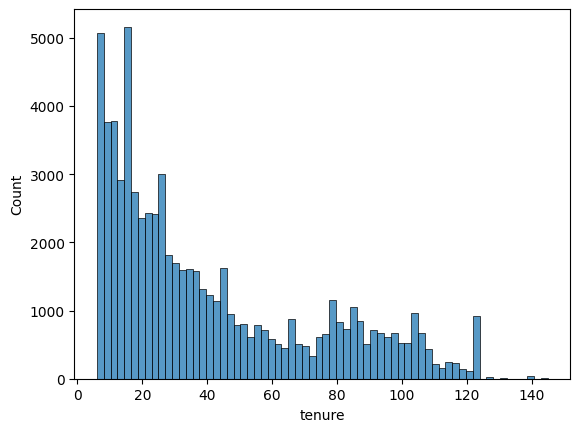

In [64]:
# Checking the distribution of the tenure variable

sns.histplot(df_f3['tenure'])
plt.show()

In [65]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df_f3['tenure_range'] = pd.cut(df_f3['tenure'], tn_range, labels=tn_label)
df_f3['tenure_range'].head()

id
0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

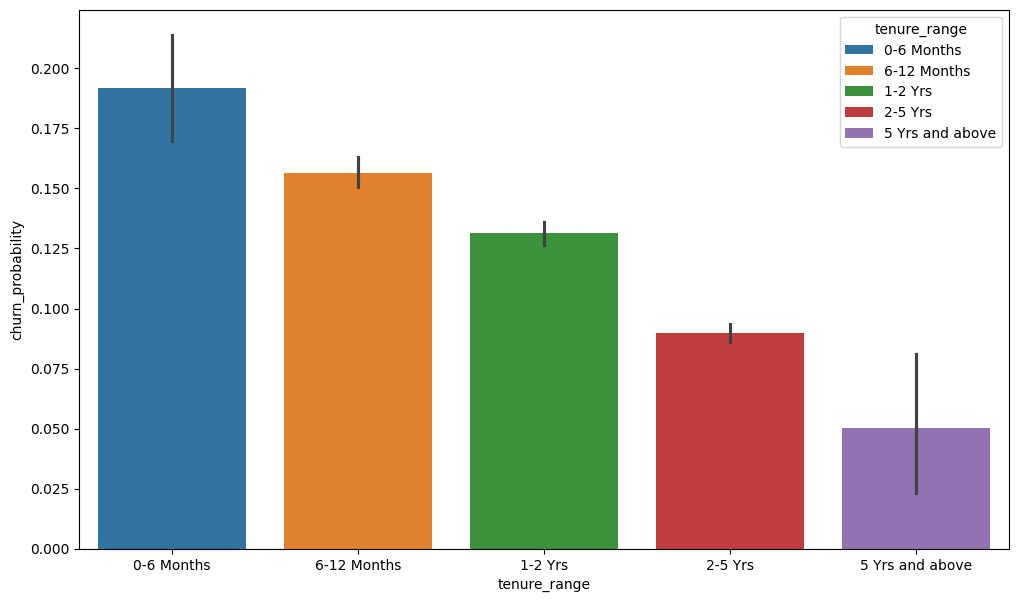

In [66]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=df_f3, hue= 'tenure_range' )
plt.show()

* **It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.** 

## 3. EDA 

In [67]:
# Saving the df_f3 set 

df_f4= df_f3.copy()
df_f4.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Data columns (total 151 columns):
 #    Column                    Dtype   
---   ------                    -----   
 0    arpu_6                    float64 
 1    arpu_7                    float64 
 2    arpu_8                    float64 
 3    onnet_mou_6               float64 
 4    onnet_mou_7               float64 
 5    onnet_mou_8               float64 
 6    offnet_mou_6              float64 
 7    offnet_mou_7              float64 
 8    offnet_mou_8              float64 
 9    roam_ic_mou_6             float64 
 10   roam_ic_mou_7             float64 
 11   roam_ic_mou_8             float64 
 12   roam_og_mou_6             float64 
 13   roam_og_mou_7             float64 
 14   roam_og_mou_8             float64 
 15   loc_og_t2t_mou_6          float64 
 16   loc_og_t2t_mou_7          float64 
 17   loc_og_t2t_mou_8          float64 
 18   loc_og_t2m_mou_6          float64 
 19   loc_og_t2m_mou_7          fl

### 3.1 Univariate analysis

In [68]:
# Converting churn column to int in order to do aggfunc in the pivot table
df_f4['churn_probability'] = df_f4['churn_probability'].astype('int64')

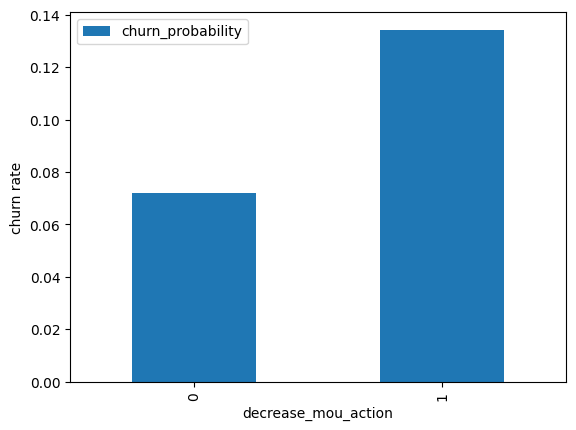

In [69]:
df_f4.pivot_table(values='churn_probability', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase. 

#### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

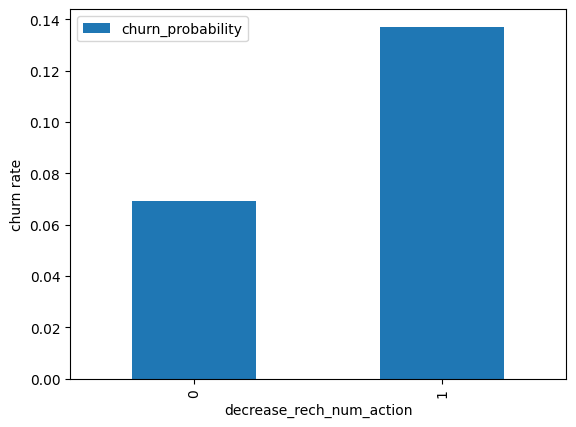

In [70]:
df_f4.pivot_table(values='churn_probability', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

#### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

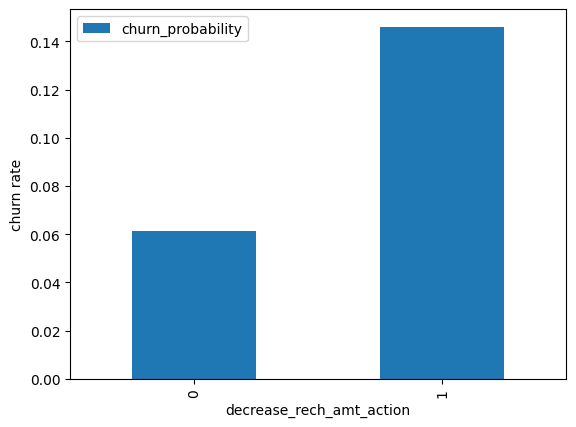

In [71]:
df_f4.pivot_table(values='churn_probability', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

#### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

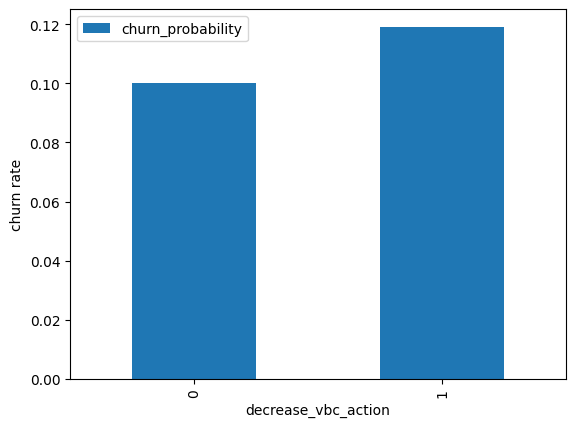

In [72]:
df_f4.pivot_table(values='churn_probability', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

#### Analysis of the average revenue per customer (churn and not churn) in the action phase

In [73]:
# Creating churn dataframe
df_f4_churn = df_f4[df_f4['churn_probability'] == 1]
# Creating not churn dataframe
df_f4_non_churn = df_f4[df_f4['churn_probability'] == 0]


[Text(0.5, 0, 'Action phase ARPU')]

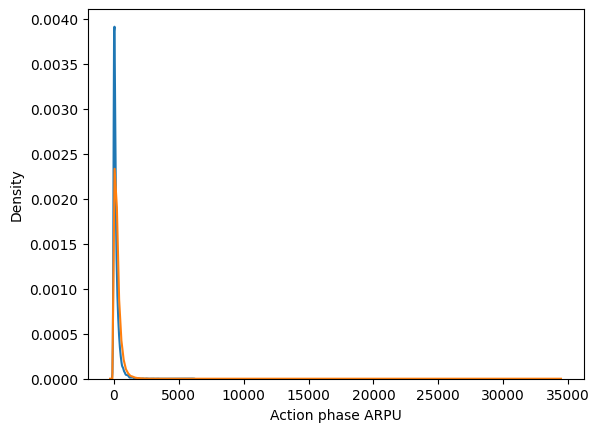

In [76]:
# Distribution plot
ax = sns.distplot(df_f4_churn['avg_arpu_action'].to_numpy(),label='churn',hist=False)
ax = sns.distplot(df_f4_non_churn['avg_arpu_action'].to_numpy(),label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000. 

##### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase MOU')]

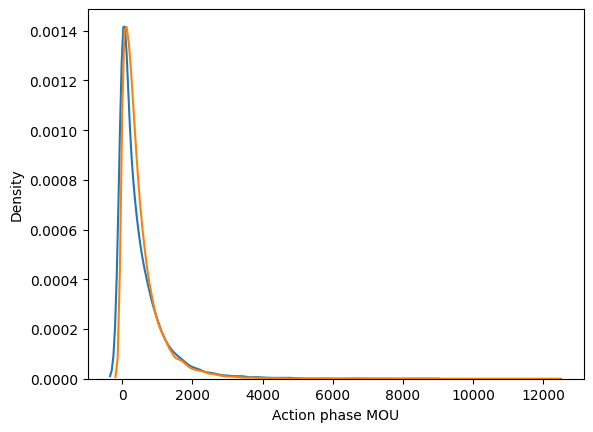

In [78]:
# Distribution plot
ax = sns.distplot(df_f4_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(df_f4_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

##### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase MOU')]

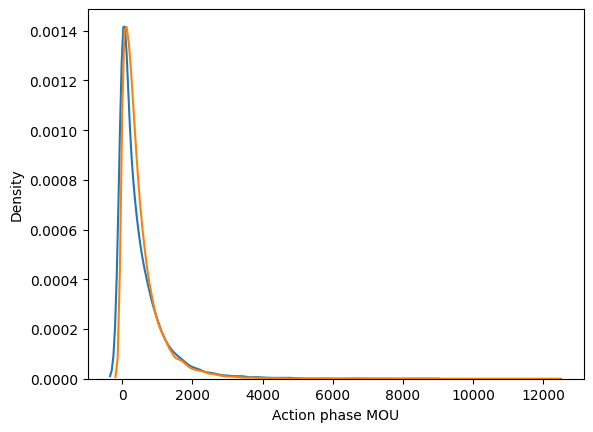

In [79]:
# Distribution plot
ax = sns.distplot(df_f4_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(df_f4_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

### 3.2 Bivariate analysis

##### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

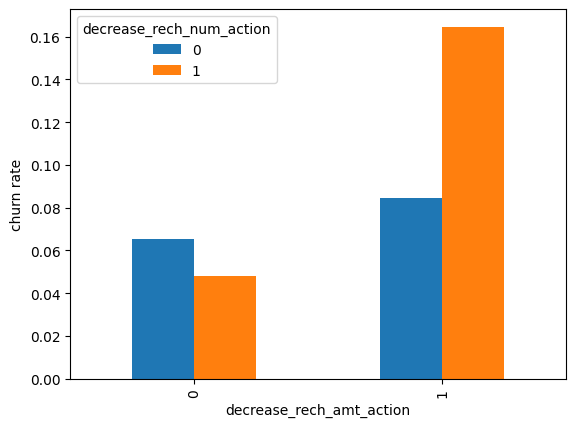

In [81]:
df_f4.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

##### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

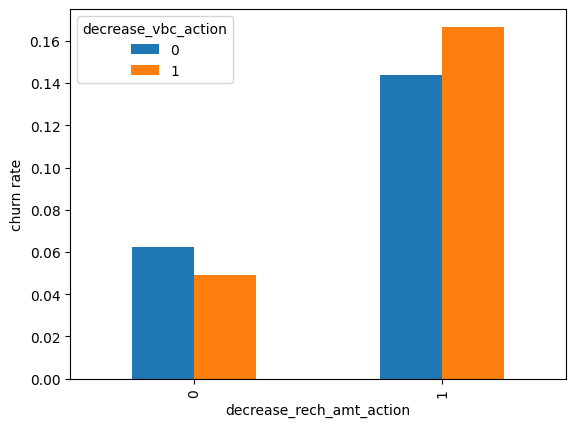

In [82]:
df_f4.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

##### Analysis of recharge amount and number of recharge in action month

In [93]:
data=df_f4

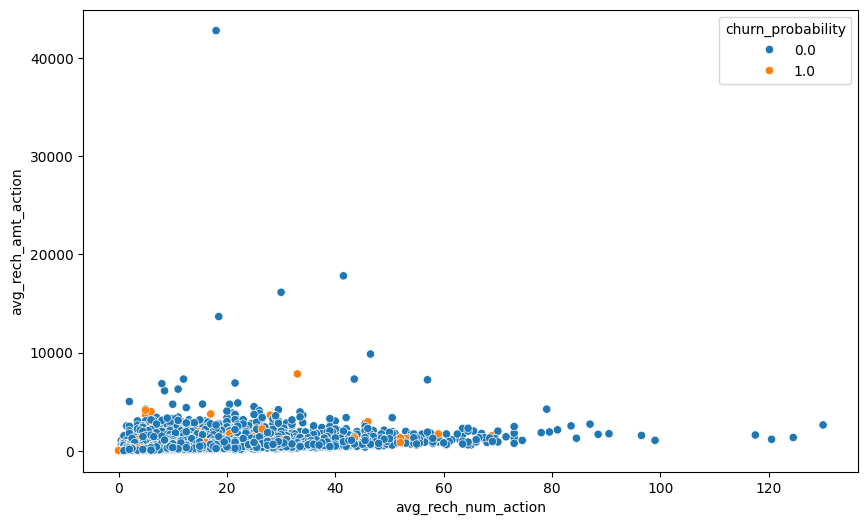

In [103]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df_f3, x='avg_rech_num_action', y='avg_rech_amt_action', hue='churn_probability')

***Analysis***

We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

## 4. Train-Test Split

In [106]:
# Putting feature variables into X
X = df_f3.drop(['churn_probability'], axis=1)

In [107]:
X = X.drop(['tenure_range'], axis=1)

In [108]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Data columns (total 149 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    arpu_6                    float64
 1    arpu_7                    float64
 2    arpu_8                    float64
 3    onnet_mou_6               float64
 4    onnet_mou_7               float64
 5    onnet_mou_8               float64
 6    offnet_mou_6              float64
 7    offnet_mou_7              float64
 8    offnet_mou_8              float64
 9    roam_ic_mou_6             float64
 10   roam_ic_mou_7             float64
 11   roam_ic_mou_8             float64
 12   roam_og_mou_6             float64
 13   roam_og_mou_7             float64
 14   roam_og_mou_8             float64
 15   loc_og_t2t_mou_6          float64
 16   loc_og_t2t_mou_7          float64
 17   loc_og_t2t_mou_8          float64
 18   loc_og_t2m_mou_6          float64
 19   loc_og_t2m_mou_7          float64
 20   loc_og_t2

In [109]:
 
# Putting target variable to y
y = df_f3['churn_probability']

In [110]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## 5. Dealing with data imbalance

* We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

churn_probability
0.0    89.811283
1.0    10.188717
Name: count, dtype: float64


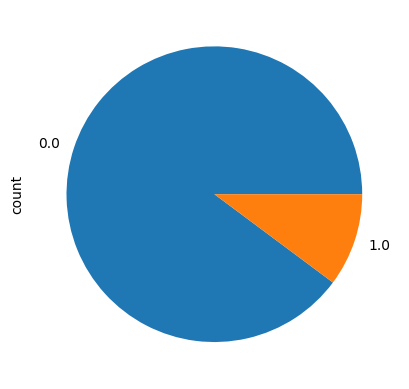

(69999, 151)


In [111]:
# lets find out churn/non churn percentage
print((df_f3['churn_probability'].value_counts()/len(df_f3))*100)
((df_f3['churn_probability'].value_counts()/len(df_f3))*100).plot(kind="pie")
plt.show()
print(df_f3.shape)

In [114]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [115]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [116]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

churn_probability
1.0    71.799597
0.0    71.799597
Name: count, dtype: float64


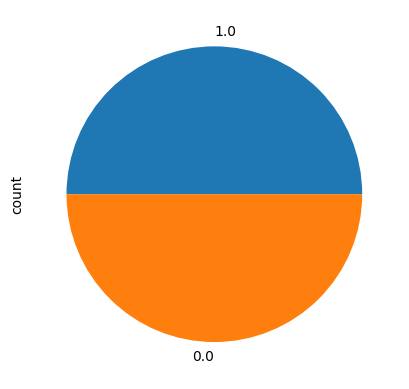

(69999, 151)


In [117]:
# lets find out churn/non churn percentage
print((y_train.value_counts()/len(df_f3))*100)
((y_train.value_counts()/len(df_f3))*100).plot(kind="pie")
plt.show()
print(df_f3.shape)

## 6. Feature Scaling

In [118]:
# Instantiate the Scaler
scaler_2 = StandardScaler()

In [119]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action,tenure
0,20.000,457.270,0.000,6.866667,57.21,0.00,13.216667,132.28,0.00,1.463333,...,0.0,0.0,0,228.6350,208.6350,0,0.00,0.00,0,26.0
1,157.847,177.925,76.996,276.990000,175.51,190.18,285.330000,145.68,138.56,0.000000,...,145.0,-55.0,1,127.4605,-30.3865,1,6.72,6.72,0,44.0
2,309.004,468.304,412.625,31.630000,38.03,8.51,122.510000,215.51,36.94,0.000000,...,578.0,289.0,0,440.4645,131.4605,0,0.00,0.00,0,51.0
3,154.108,60.291,265.921,53.640000,12.71,49.81,114.810000,40.49,239.84,0.000000,...,190.0,10.0,0,163.1060,8.9980,0,0.00,0.00,0,29.0
4,228.004,222.476,180.528,11.460000,12.99,19.28,143.510000,154.64,103.03,28.030000,...,221.0,-50.0,1,201.5020,-26.5020,1,0.00,0.00,0,36.0


In [120]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [121]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler_2.fit_transform(X_train[cols_scale])

In [122]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action,tenure
0,-0.779047,0.646091,-0.635473,-0.424721,-0.216263,-0.358600,-0.556371,-0.122414,-0.494535,-0.162662,...,-0.726375,0.212381,0,0.015190,0.928365,0,-0.228735,0.011061,0,-0.311945
1,-0.378315,-0.211868,-0.392450,0.409789,0.176123,0.375799,0.259130,-0.080026,0.013579,-0.185149,...,-0.315043,0.055767,1,-0.325295,0.114046,1,-0.195721,0.045912,0,0.328944
2,0.061111,0.679980,0.666895,-0.348218,-0.279880,-0.325738,-0.228828,0.140864,-0.359072,-0.185149,...,0.913281,1.035318,0,0.728067,0.665440,0,-0.228735,0.011061,0,0.578178
3,-0.389184,-0.573160,0.203853,-0.280221,-0.363863,-0.166254,-0.251904,-0.412769,0.384984,-0.185149,...,-0.187388,0.240857,0,-0.205336,0.248224,0,-0.228735,0.011061,0,-0.205130
4,-0.174363,-0.075037,-0.065672,-0.410530,-0.362935,-0.284149,-0.165893,-0.051683,-0.116713,0.245592,...,-0.099448,0.070005,1,-0.076121,0.127280,1,-0.228735,0.011061,0,0.044104


### 6.1 Scaling the test set
* We don't fit scaler on the test set. We only transform the test set.

In [123]:
# Transform the test set
X_test[cols_scale] = scaler_2.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action,tenure
id,,,,,,,,,,,,,,,,,,,,,
3425,-0.736307,0.972665,-0.651727,-0.364900,1.319780,-0.358600,-0.595801,2.068553,-0.488814,-0.172702,...,0.184230,1.012538,0,0.185443,1.050632,0,-0.228735,0.011061,0,-0.240735
33067,1.408608,0.992174,0.149988,0.905015,0.522902,-0.259628,2.934805,0.732235,-0.137432,0.907915,...,0.652297,-1.088941,1,0.623537,-1.019552,1,-0.228735,0.011061,0,-0.240735
52420,-0.068865,-0.595931,-0.633831,-0.117874,-0.315669,-0.358600,-0.387515,-0.537401,-0.491308,-0.027175,...,-0.655456,-0.627641,1,-0.664393,-0.591892,1,-0.228735,0.011061,0,-0.311945
5220,-0.747490,-0.623333,-0.374235,-0.441733,-0.406021,-0.358600,-0.585401,-0.539711,-0.494535,-0.185149,...,-0.526383,0.327706,0,-0.541011,0.328313,0,1.099220,1.412910,0,2.607658
33958,-0.638722,-0.408857,-0.462413,-0.421281,-0.306216,-0.283840,-0.236680,0.009905,-0.375977,-0.185149,...,-0.493760,0.445879,0,-0.470516,0.272210,0,-0.228735,0.011061,0,1.112252


# 7. Model Building and Validating 

In [124]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

## Business Understanding

In the case of telecom churn prediction, where you want to identify customers at risk of leaving, the most important metric between specificity, sensitivity, and accuracy depends on the business cost associated with each outcome. Here's a breakdown:

* Accuracy: This reflects the overall correctness of the model's predictions (both identifying churners and non- churners correctly). It's a good general measure but might not tell the whole story in this case.

* Sensitivity: This refers to the model's ability to correctly identify true churners (i.e., how many customers predicted to churn actually do churn).  High sensitivity is ideal for churn prediction.

Why?  Because the cost of missing a churner (who then leaves and takes their business elsewhere) can be significant.  The telecom company loses revenue, and the churner might become a customer of a competitor.

Specificity: This refers to the model's ability to correctly identify non-churners (i.e., how many customers predicted to stay actually do stay). High specificity is desirable, but it's less crucial than high sensitivity in this context. Misclassifying a non-churner as a churner might lead to unnecessary customer retention efforts, but it doesn't cause a direct loss of revenue or a new customer for the competitor.
In conclusion, while accuracy is a good overall measure, for churn prediction,  focus on achieving high sensitivity.  This ensures you catch as many true churners as possible and allows the telecom company to take proactive steps to retain them.

In [126]:
#Function to evaluate models:

def function_evaluate(model, x, y):

    # predict churn on test data
    y_pred = model.predict(x)
    
    # create confusion matrix
    cm = confusion_matrix(y, y_pred)
    print(cm)
    
    #accuracy
    print("accuracy: ", model.score(x, y) )
    
    # check sensitivity and specificity
    sensitivity, specificity, _ = sensitivity_specificity_support(y, y_pred, average='binary')
    print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
    
    
    

## 7.1 PCA

In [127]:
# apply pca to train data
pca = PCA()

In [128]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [129]:
# extract pca model from pipeline
# pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       13.61
1       21.19
2       27.27
3       32.58
4       36.45
        ...  
144    100.00
145    100.00
146    100.00
147    100.00
148    100.00
Length: 149, dtype: float64


~ 53 components explain 90% variance

~ 70 components explain 95% variance

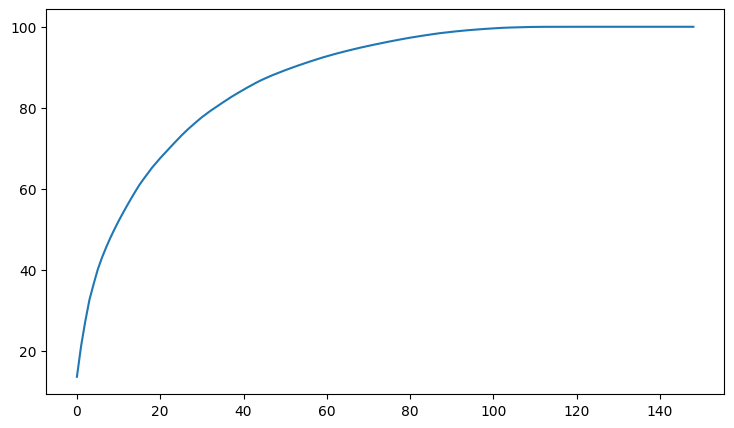

In [130]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [131]:
# create pipeline
PCA_VARS = 53
steps = [
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [132]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8208778527228954

### Result : 

In [133]:
# On Train set
function_evaluate(pipeline, X_train, y_train)

[[39216 11043]
 [ 6962 43297]]
accuracy:  0.8208778527228954
Sensitivity: 	0.86
Specificity: 	0.78


In [134]:
# On Test set
function_evaluate(pipeline, X_test, y_test)

[[9929 2679]
 [ 216 1176]]
accuracy:  0.7932142857142858
Sensitivity: 	0.84
Specificity: 	0.79


In [135]:
# # check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.89


## 7.2 Hyperparameter tuning - PCA and Logistic Regression

In [137]:
# PCA
pca = PCA()

# Logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.5, 1: 0.5})

# create pipeline
steps = [ 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [138]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.5,
                                                                         1: 0.5}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [139]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.768496,0.397132,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
1,6.344803,1.817294,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2,7.251546,1.638001,0.140678,0.021974,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.892658,0.897147,0.898005,0.898512,0.898768,0.897018,0.002249,12
3,11.032065,1.515349,0.142357,0.031008,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.900736,0.902982,0.905913,0.906132,0.903891,0.903931,0.001994,5
4,7.048488,0.623317,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
5,9.694968,0.353021,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
6,7.954636,0.412929,0.098102,0.022789,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.892323,0.898355,0.898430,0.897649,0.898124,0.896976,0.002343,13
7,11.924872,1.268381,0.129399,0.020599,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.900678,0.902907,0.906013,0.906076,0.903948,0.903925,0.002028,6
8,6.470486,0.878953,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,9.074297,0.691548,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [140]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9039788939854893
Best hyperparameters:  {'logistic__C': 1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [141]:
# On Train set
function_evaluate(model, X_train, y_train)

[[39643 10616]
 [ 6370 43889]]
accuracy:  0.9044480987834377
Sensitivity: 	0.87
Specificity: 	0.79


In [142]:
# On Test set
function_evaluate(model, X_test, y_test)

[[10031  2577]
 [  216  1176]]
accuracy:  0.8883514822736157
Sensitivity: 	0.84
Specificity: 	0.8


In [143]:
# # check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.89


## 7.3 Random Forest

In [147]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.5, 1: 0.5}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [148]:
start_time=time.time()
# fit model
model.fit(X_train, y_train)


end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds\n")

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Execution Time =  238.83 seconds



In [149]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9925560207497911
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [150]:
# On Train set
function_evaluate(model, X_train, y_train)

[[50257     2]
 [    0 50259]]
accuracy:  0.999999999604112
Sensitivity: 	1.0
Specificity: 	1.0


In [151]:
# On Test set
function_evaluate(model, X_test, y_test)

[[12061   547]
 [  381  1011]]
accuracy:  0.9334078276336134
Sensitivity: 	0.73
Specificity: 	0.96


## 7.4 Random forest with PCA

In [153]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

# Instantiate PCA with 53 components
pca_final = IncrementalPCA(n_components=53)

# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

X_test_pca= pca_final.fit_transform(X_test)

In [155]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)



In [156]:
# Fit the model
rfc_model=grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [157]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rfc_model.best_score_,'using',rfc_model.best_params_)

We can get accuracy of 0.8279313157842377 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 300}


In [ ]:
# # predict churn on test data
# y_pred = model.predict(X_test)

# # create confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# #accuracy
# print("accuracy: ", model.score(X_test, y_test) )

# # check sensitivity and specificity
# sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
# print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')



# # check the area under the curve
# y_pred_prob = model.predict_proba(X_test)[:, 1]
# print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

In [159]:
# On Train set
function_evaluate(rfc_model, X_train_pca, y_train)

[[42473  7786]
 [ 9476 40783]]
accuracy:  0.82826956366024
Sensitivity: 	0.81
Specificity: 	0.85


In [160]:
rfc_model# On Test set
function_evaluate(rfc_model, X_test_pca, y_test)

[[6349 6259]
 [ 500  892]]
accuracy:  0.5172142857142857
Sensitivity: 	0.64
Specificity: 	0.5


## Final conclusion 
After trying several models we can see that for achieving the best sensitivity, which was our ultimate goal, the classic Logistic regression with PCA models performs well. The model delivered sensitivity index of approx 84% on test data. Also we have good accuracy of apporx 88%. If only Accuracy is important Random Forest model was able to get approx 93% on test data.

## 8. Business recomendation

#### Top predictors

Below are few top variables selected in the logistic regression model.

| Variables   | Coefficients |
|---------------------|--------------|
|loc_ic_mou_8|-3.3287|
|og_others_7|-2.4711|
|ic_others_8|-1.5131|
|isd_og_mou_8|-1.3811|
|decrease_vbc_action|-1.3293|
|monthly_3g_8|-1.0943|
|std_ic_t2f_mou_8|-0.9503|
|monthly_2g_8|-0.9279|
|loc_ic_t2f_mou_8|-0.7102|
|roam_og_mou_8|0.7135|

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:- 

If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

***Recomendations***

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Target the customers, whose outgoing others charge in July and incoming others on August are less.
3. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned. 
5. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
6. Cutomers decreasing monthly 2g usage for August are most probable to churn.
7. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
8. roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.


#### Plots of important predictors for churn and non churn customers

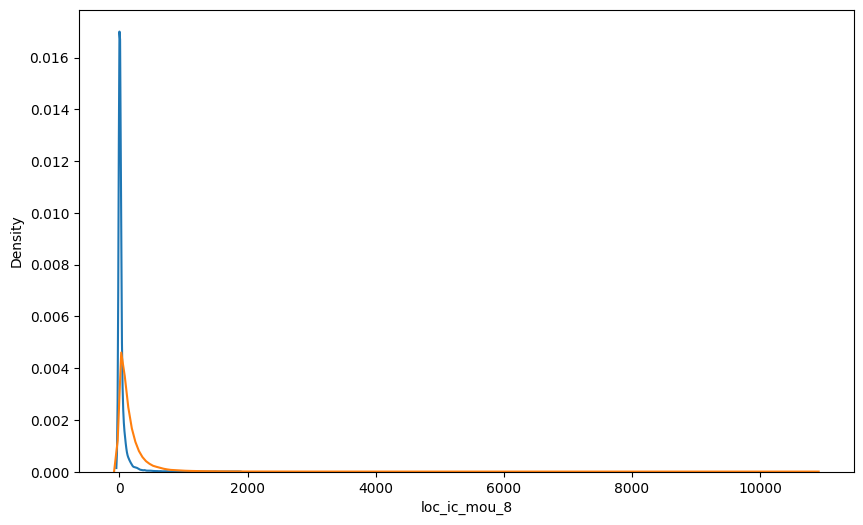

In [163]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(df_f4_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(df_f4_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

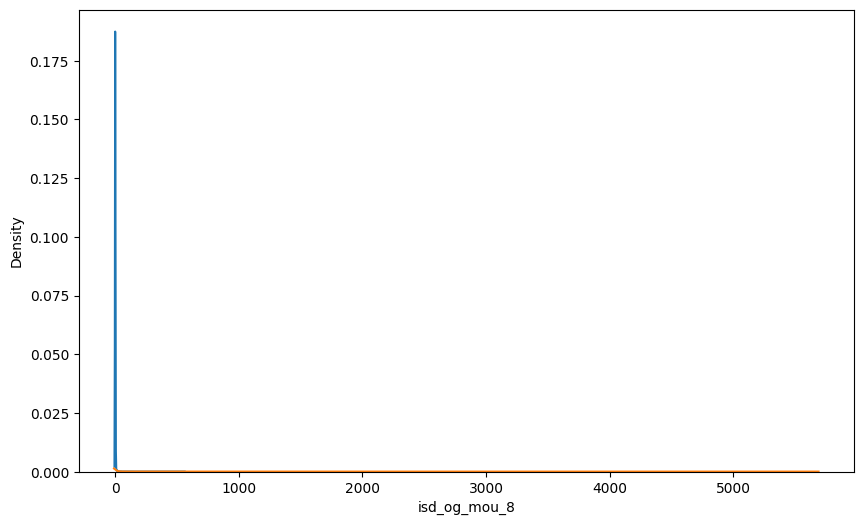

In [164]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(df_f4_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(df_f4_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

In [ ]:
We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.

In [ ]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()

In [ ]:
The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.

Similarly we can plot each variables, which have higher coefficients, churn distribution.